<a href="https://colab.research.google.com/github/Ahmetyldrr/NLP-Processing-Pratices/blob/main/Part2_Advanced_NLP_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4: Language Modeling**

## **4.1 N-grams**

Metin oluşturmasında önemlidir.

 Tutarlı ve bağlamsal olarak uygun cümlelerin oluşturulmasını sağlarlar

Bitişik kelime dizilerinin sağladığı bağlamı dikkate alarak metnin bir dilden diğerine doğru şekilde çevrilmesine yardımcı olurlar

**Unigram (1-gram): "Doğal"**

Örneğin, unigramlar bireysel kelime sıklıklarını yakalayarak bir metindeki en yaygın kelimelere dair içgörü sağlar.

Öte yandan bigramlar, bitişik kelime çiftleri arasındaki ilişkileri yakalayarak ortak kelime kombinasyonlarını ortaya çıkarır.

**Bigram (2-gram): "Doğal Dil"**

**Trigram (3-gram): "Doğal Dil İşleme"**

Trigramlar ve daha yüksek dereceli N-gramlar daha da karmaşık ilişkileri yakalayarak üç veya daha fazla kelimeden oluşan dizilerin bağlamda nasıl birlikte kullanıldığını gösterir.

N-gramların kullanımı, metin tahmini, makine çevirisi ve konuşma tanıma gibi çeşitli uygulamalarda hayati öneme sahiptir

N-gramları analiz ederek, metnin sözdizimsel ve anlamsal özellikleri daha iyi anlaşılabilir; bu da daha doğru ve etkili dil modelleri oluşturmak için önemlidir. Bu nedenle, N-gramları anlamak ve kullanmak, NLP görevlerinin performansını önemli ölçüde artırabilir.

In [ ]:
from nltk import ngrams
from collections import Counter
import nltk
nltk.download('all')
z

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

Unigrams:
['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'study', '.']
\\nBigrams:
['Natural Language', 'Language Processing', 'Processing is', 'is a', 'a fascinating', 'fascinating field', 'field of', 'of study', 'study .']
\\nTrigrams:
['Natural Language Processing', 'Language Processing is', 'Processing is a', 'is a fascinating', 'a fascinating field', 'fascinating field of', 'field of study', 'of study .']


[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [ ]:

# Sample text
text = "Natural Language Processing is a fascinating field of study."

# Tokenize the text into words
tokens = nltk.word_tokenize(text)
# Function to generate N-grams
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]
    # Generate unigrams, bigrams, and trigrams
unigrams = generate_ngrams(tokens, 1)
bigrams = generate_ngrams(tokens, 2)
trigrams = generate_ngrams(tokens, 3)

print("Unigrams:")
print(unigrams)
print("\\\\nBigrams:")
print(bigrams)
print("\\\\nTrigrams:")
print(trigrams)

Unigrams:
['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'study', '.']
\\nBigrams:
['Natural Language', 'Language Processing', 'Processing is', 'is a', 'a fascinating', 'fascinating field', 'field of', 'of study', 'study .']
\\nTrigrams:
['Natural Language Processing', 'Language Processing is', 'Processing is a', 'is a fascinating', 'a fascinating field', 'fascinating field of', 'field of study', 'of study .']


**4.1.3 N-gram Dil Modelleri**

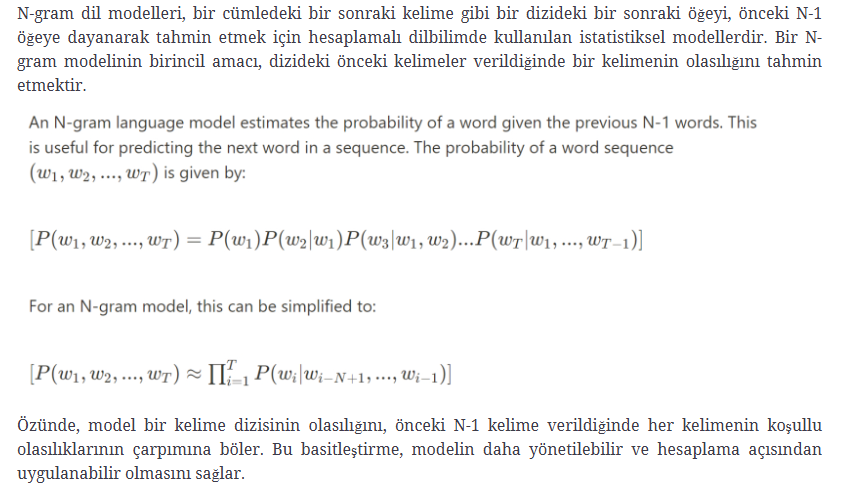

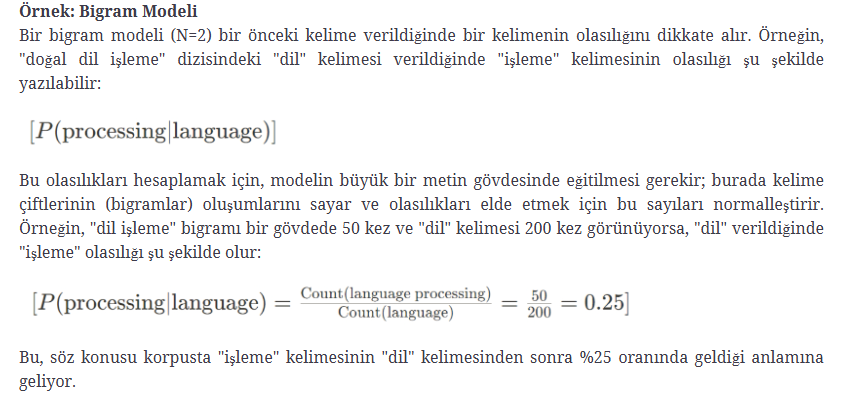

**N-gram Modelleriyle İlgili Zorluklar**

**Seyreklik :** N arttıkça, olası N-gram sayısı üssel olarak artar ve bu da veri seyrekliğine yol açar. Bu, birçok N-gramın eğitim gövdesinde görünmeyebileceği ve bu da olasılıklarını doğru bir şekilde tahmin etmeyi zorlaştıracağı anlamına gelir. Örneğin, bir trigram modeliniz varsa (N=3), olası trigram sayısı son derece büyük olabilir ve bu trigramların çoğu eğitim verilerinizde asla gerçekleşmeyebilir ve bu da güvenilir olasılık tahminleri sağlamayı zorlaştırır.

**Bağlam Sınırlaması :** N-gram modelleri yalnızca sabit bir bağlam penceresi (N-1 kelime) yakalar ve bu da dildeki uzun menzilli bağımlılıkları yakalamak için yetersiz olabilir. Örneğin, bir bigram modeli kullanıyorsanız, bir sonraki kelimeyi tahmin etmek için yalnızca önceki kelimeyi dikkate alır ve bu, özellikle karmaşık veya uzun metinlerde bir cümlenin tam bağlamını anlamak için yeterli olmayabilir.

**Bellek Kullanımı :** Yüksek mertebeli N-gram modelleri, tüm olası N-gramların olasılıklarını depolamak için önemli miktarda bellek gerektirir. N değeri ne kadar yüksekse, bu olasılıkları depolamak için o kadar fazla belleğe ihtiyaç duyulur ve bu da önemli bir hesaplama yükü haline gelebilir. Örneğin, 4-gramlık bir modelin, dört kelimenin tüm olası dizilerinin olasılıklarını depolaması gerekir ve bu da büyük kelime dağarcıkları için pratik olmayabilir.

**Kullanım Alanları**

**Metin Tahmini :** N-gram modelleri bir dizideki bir sonraki kelimeyi tahmin etmede etkilidir. Bu yetenek genellikle mobil cihazlardaki tahmini metin girişinde kullanılır, burada model kullanıcının girdisini tamamlamak için önceki kelimelerin bağlamına göre olası kelimeler önerir. Bu özellik yazma verimliliğini ve doğruluğunu artırır.

**Konuşma Tanıma :** Konuşmadan metne sistemleri alanında, N-gram modelleri transkripsiyonların doğruluğunu önemli ölçüde artırır. En olası kelime dizilerini tahmin ederek, bu modeller olası olmayan kelime kombinasyonlarını filtrelemeye yardımcı olur, böylece konuşma tanıma yazılımının çıktısını iyileştirir ve daha güvenilir hale getirir.

**Makine Çevirisi :** Metni bir dilden diğerine çevirirken, N-gram modelleri bitişik kelime dizilerinin sağladığı bağlamı dikkate alarak önemli bir rol oynar. Bu bağlamsal anlayış, yalnızca doğru değil aynı zamanda bağlamsal olarak uygun çeviriler üretmeye yardımcı olur ve orijinal metnin anlamının korunmasını sağlar.

**Metin Oluşturma :** N-gram modelleri tutarlı ve bağlamsal olarak uygun cümleler oluşturmak için de kullanılır. Bu, doğal sesli dil üretme yeteneğinin önemli olduğu sohbet robotları ve otomatik içerik oluşturma gibi uygulamalarda özellikle yararlıdır. Büyük metin korpuslarındaki kalıpları analiz ederek, N-gram modelleri insan dili kullanımını taklit eden cümleler oluşturabilir ve böylece kullanıcı deneyimini iyileştirebilir.

**4.1.4 N-gram Dil Modelinin Eğitimi**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
corpus = [
"Natural Language Processing is a fascinating field of study.",
"Machine learning and NLP are closely related.",
"Language models are essential for NLP tasks."
]
# Tokenize the text into words
tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in corpus]
tokenized_corpus

[['Natural',
  'Language',
  'Processing',
  'is',
  'a',
  'fascinating',
  'field',
  'of',
  'study',
  '.'],
 ['Machine', 'learning', 'and', 'NLP', 'are', 'closely', 'related', '.'],
 ['Language', 'models', 'are', 'essential', 'for', 'NLP', 'tasks', '.']]

**N-gram Oluşturma** : Metin belirteçlere ayrıldıktan sonraki adım, bu belirteçlerden N-gram oluşturmaktır. N-gramlar, metinden N öğenin bitişik dizileridir.

In [ ]:
from nltk.util import ngrams
# Example of generating bigrams (N=2)
bigrams = [ngrams(sentence, 2) for sentence in tokenized_corpus]
bigrams

[<generator object ngrams at 0x7f6b1b521030>,
 <generator object ngrams at 0x7f6b1b5209d0>,
 <generator object ngrams at 0x7f6b1b521250>]

**Counting N-gram Occurrences:** Bir N-gram modelinin eğitiminin özü, korpustaki her N-gram'ın oluşumunu saymaktır. Bu, belirteçleştirilmiş metinde yineleme yapmayı ve her N-gram'ın ne sıklıkta göründüğünü kaydetmeyi içerir.

In [ ]:
from collections import defaultdict
def count_ngrams(tokenized_corpus, n):
    counts = defaultdict(lambda: defaultdict(int))
    for sentence in tokenized_corpus:
        for ngram in ngrams(sentence, n):
            counts[ngram[:-1]][ngram[-1]] += 1
    return counts
# Count bigrams
bigram_counts = count_ngrams(tokenized_corpus, 2)
bigram_counts

defaultdict(<function __main__.count_ngrams.<locals>.<lambda>()>,
            {('Natural',): defaultdict(int, {'Language': 1}),
             ('Language',): defaultdict(int, {'Processing': 1, 'models': 1}),
             ('Processing',): defaultdict(int, {'is': 1}),
             ('is',): defaultdict(int, {'a': 1}),
             ('a',): defaultdict(int, {'fascinating': 1}),
             ('fascinating',): defaultdict(int, {'field': 1}),
             ('field',): defaultdict(int, {'of': 1}),
             ('of',): defaultdict(int, {'study': 1}),
             ('study',): defaultdict(int, {'.': 1}),
             ('Machine',): defaultdict(int, {'learning': 1}),
             ('learning',): defaultdict(int, {'and': 1}),
             ('and',): defaultdict(int, {'NLP': 1}),
             ('NLP',): defaultdict(int, {'are': 1, 'tasks': 1}),
             ('are',): defaultdict(int, {'closely': 1, 'essential': 1}),
             ('closely',): defaultdict(int, {'related': 1}),
             ('related',): def

**Olasılıkları Hesaplama :** N-gramları saydıktan sonraki adım olasılıklarını hesaplamaktır. Bu, sayımları normalleştirerek yapılır, yani her N-gramın sayısı aynı öneki (bağlam) paylaşan toplam N-gram sayısına bölünür.

In [ ]:
def calculate_probabilities(counts):
    probabilities = defaultdict(dict)
    for context in counts:
        total_count = float(sum(counts[context].values()))
        for word in counts[context]:
            probabilities[context][word] = counts[context][word] / total_count
    return probabilities
# Calculate bigram probabilities
bigram_probabilities = calculate_probabilities(bigram_counts)
bigram_probabilities

defaultdict(dict,
            {('Natural',): {'Language': 1.0},
             ('Language',): {'Processing': 0.5, 'models': 0.5},
             ('Processing',): {'is': 1.0},
             ('is',): {'a': 1.0},
             ('a',): {'fascinating': 1.0},
             ('fascinating',): {'field': 1.0},
             ('field',): {'of': 1.0},
             ('of',): {'study': 1.0},
             ('study',): {'.': 1.0},
             ('Machine',): {'learning': 1.0},
             ('learning',): {'and': 1.0},
             ('and',): {'NLP': 1.0},
             ('NLP',): {'are': 0.5, 'tasks': 0.5},
             ('are',): {'closely': 0.5, 'essential': 0.5},
             ('closely',): {'related': 1.0},
             ('related',): {'.': 1.0},
             ('models',): {'are': 1.0},
             ('essential',): {'for': 1.0},
             ('for',): {'NLP': 1.0},
             ('tasks',): {'.': 1.0}})

**Modeli Kullanma :** Hesaplanan N-gram olasılıklarıyla, model artık belirli bir bağlamı takip eden bir kelimenin olasılığını tahmin edebilir. Bu, metin oluşturma ve konuşma tanıma gibi görevler için yararlıdır.

In [ ]:
def get_ngram_probability(model, context, word):
    return model[context].get(word, 0)
# Example: Get probability of "NLP" following "for"
probability = get_ngram_probability(bigram_probabilities, ('for',), 'NLP')
print("Bigram Probability (NLP | for):", probability)

Bigram Probability (NLP | for): 1.0


In [ ]:
from collections import defaultdict
import nltk
from nltk.util import ngrams

# Sample text corpus
corpus = [
    "Natural Language processing is a fascinating field of study.",
    "Machine learning and NLP are closely related.",
    "Language models are essential for NLP tasks language models"
]

# Tokenize the text into words
tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in corpus]

# Function to calculate bigram probabilities
def train_bigram_model(tokenized_corpus):
    model = defaultdict(lambda: defaultdict(lambda: 0))
    # Count bigrams
    for sentence in tokenized_corpus:
        for w1, w2 in ngrams(sentence, 2):
            model[w1][w2] += 1
    # Calculate probabilities
    for w1 in model:
        total_count = float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2] /= total_count
    return model

# Train the bigram model
bigram_model = train_bigram_model(tokenized_corpus)

# Function to get the probability of a bigram
def get_bigram_probability(bigram_model, w1, w2):
    return bigram_model[w1][w2]

print("Bigram Probability (NLP | for):")
print(get_bigram_probability(bigram_model, 'Language', 'models'))

Bigram Probability (NLP | for):
0.5


**4.1.5 N-gram Modellerinin Sınırlamaları**

**Seyreklik Sorunları :**

N değeri arttıkça, olası N-gram sayısı üssel olarak artar. Bu, birçok olası N-gramın eğitim korpusunda görünmeyebileceği veri seyrekliğine neden olur. Örneğin, bir trigram modelinde, olası trigram sayısı son derece büyüktür ve bu trigramların çoğu eğitim verilerinde asla ortaya çıkmayabilir. Bu, olasılıklarını doğru bir şekilde tahmin etmeyi zorlaştırır ve güvenilir olmayan tahminlere yol açar.

**Bağlam Sınırlaması :**

N-gram modelleri yalnızca sabit bir bağlam penceresini, özellikle önceki N-1 kelimeyi yakalar. Bu sabit pencere, metindeki uzun menzilli bağımlılıkları yakalamak için yetersiz olabilir. Örneğin, bir bigram modelinde, bir sonraki kelimeyi tahmin ederken yalnızca hemen önceki kelime dikkate alınır. Bu, özellikle önemli bilgilerin birkaç kelime veya cümleye yayılabileceği karmaşık veya uzun metinlerde, bir cümlenin tam bağlamını anlamada önemli bir sınırlama olabilir.

**Bellek Kullanımı :**

Daha yüksek mertebeli N-gram modelleri, tüm olası N-gramların olasılıklarını depolamak için önemli miktarda bellek gerektirir. N değeri ne kadar büyükse, bu olasılıkları depolamak için o kadar fazla bellek gerekir. Örneğin, 4-gramlık bir modelin, dört kelimenin tüm olası dizilerinin olasılıklarını depolaması gerekir; bu da hesaplama açısından pahalı ve büyük kelime dağarcıkları için pratik olmayabilir.

**Genelleme Eksikliği :**

N-gram modelleri, görülmemiş verilere genelleme yapmakta zorluk çekebilir. Eğitim verilerinde gözlemlenen belirli dizilere çok fazla güvenirler, bu da yeni veya biraz farklı dizilerde iyi performans gösteremeyebilecekleri anlamına gelir. Bu genelleme eksikliği, dil kullanımının oldukça değişken ve bağlama bağlı olduğu gerçek dünya uygulamalarında etkinliklerini sınırlayabilir.

**Kelime Dışı Kelimelerin Ele Alınması :**

N-gram modelleri, eğitim sırasında görülmeyen kelimeler olan kelime dışı (OOV) kelimeleri işlemekte zorluk çeker. Bu, model yeni kelimeler veya ifadelerle karşılaştığında, bunlarla ilişkili önceden bilgisi veya olasılıkları olmadığı için düşük performansla sonuçlanabilir.

**Anlamsal Anlamı Yakalayamama :**

N-gram modelleri yalnızca kelime dizileri temelinde çalışır ve kelimelerin altta yatan semantik anlamını yakalamaz. Kelimeleri anlamlarını veya ilişkilerini anlamadan bağımsız belirteçler olarak ele alırlar ve bu da dilin daha derin bir şekilde anlaşılmasını gerektiren görevleri yerine getirme yeteneklerini sınırlayabilir.

## **4.2 Gizli Markov Modelleri**

Gizli Markov Modelleri (HMM'ler), özellikle Doğal Dil İşleme (NLP) alanında dizi analizi için yaygın olarak kullanılan güçlü ve çok yönlü istatistiksel modellerdir. Bu modeller son derece etkili olduklarını kanıtlamıştır ve sözcük türü etiketleme, adlandırılmış varlık tanıma ve konuşma tanıma dahil ancak bunlarla sınırlı olmamak üzere çeşitli uygulamalarda yaygın olarak kullanılmaktadır. HMM'leri kullanarak, kelimeler veya etiketler gibi gözlemlenebilir olayların dizilerini ve bu gözlemlenebilir olayları oluşturmaktan sorumlu olan altta yatan gizli durumları modelleyebilirsiniz.

HMM'lerin gücü, diziler ve gizli durumları arasındaki olasılıksal ilişkileri yakalama becerisinde yatar; bu, gerçek durum dizisinin doğrudan gözlemlenemediği sıralı verilerle uğraşırken özellikle yararlı olabilir.

Tür-sözcük etiketlemesi bağlamında, HMM'ler hem gözlemlenen sözcük dizisine hem de tür-sözcük etiketlerinin gizli durum dizisine dayanarak bir cümledeki her kelimenin dilbilgisi kategorisini tahmin etmek için kullanılabilir. Benzer şekilde, adlandırılmış varlık tanımada, HMM'ler bir metindeki kişilerin, kuruluşların ve yerlerin adları gibi varlıkları tanımlamaya ve sınıflandırmaya yardımcı olur.
Konuşma tanıma için HMM'ler, konuşulan sözcüklerin dizisini ve bunlara karşılık gelen gizli fonetik durumları modelleyerek konuşulan dili metne dönüştürmek için kullanılır.
Genel olarak Gizli Markov Modelleri, NLP uygulayıcılarının araç setinin temel taşlarından biridir ve çok çeşitli dizi analizi problemlerini ele almak için sağlam bir çerçeve sunar.

**4.2.1 Gizli Markov Modellerini Anlamak**

**states**

Bunlar gözlemlenebilir olayları üreten gizli değişkenlerdir. Örneğin, sözcük türü etiketlemede, gizli durumlar isimler, fiiller, sıfatlar vb. gibi sözcük türleri olabilir. Bu durumlar bir gözlemci tarafından doğrudan görülemez ancak gözlemlenebilir sonuçları etkiler.
Gizli durum kavramı, Gizli Markov Modelleri (HMM) gibi modellerde çok önemlidir. Bu modellerde gerçek durum dizisi (örneğin, sözcük türleri dizisi) doğrudan gözlemlenemez ancak gözlemlenen verilerden (örneğin, sözcük dizisi) çıkarılması gerekir.
Bu gizli durumlar, veri dizisindeki altta yatan yapıyı ve bağımlılıkları anlamaya yardımcı olarak daha doğru tahminler ve analizler yapılmasını sağlar.

**Gözlemler - observaiton**

Bunlar gizli durumlar tarafından üretilen gözlemlenebilir olaylardır. Örneğin, bir cümledeki kelimeler. Gözlemler, gerçekten görebildiğimiz ve ölçebildiğimiz veri noktalarıdır ve gizli durumları çıkarsamak için temel görevi görürler.
Gözlemler, bir cümledeki kelimeler gibi gizli durumlar tarafından üretilen görünür olaylardır. Bunlar gözlemleyebileceğimiz ve ölçebileceğimiz veri noktalarıdır ve gizli durumları çıkarsamaya yardımcı olurlar. Gözlemler, Gizli Markov Modeli'ndeki (HMM) gizli durumları çıkarsamanın temelini oluşturur.
Örneğin, sözcük türü etiketlemesinde, bir cümledeki gözlemlenen kelimeler gözlemlerdir, altta yatan dil bilgisi kategorileri (isimler, fiiller, vb.) ise gizli durumlardır. Gözlem dizisini analiz ederek, HMM'leri kullanarak gizli durumların en olası dizisini tahmin edebilir ve metnin yapısı ve anlamı hakkında değerli içgörüler sağlayabiliriz.

**Geçiş Olasılıkları**

Geçiş olasılıkları, bir sistemde bir durumdan diğerine geçme olasılığını ifade eder. Bunlar, ardışık adımlarda gizli durumlar arasında geçiş yapma şanslarını tanımlamak için kullanılır. Örneğin, bir dil modelinde bu, bir fiil durumundan bir isim durumuna geçiş yapma olasılığını gösterebilir.
Bu olasılıklar, durumların sırasını ve akışını anlamanın önemli olduğu Doğal Dil İşleme (NLP) gibi çeşitli uygulamalarda kritik öneme sahiptir. Gizli Markov Modeli (HMM) bağlamında, geçiş olasılıkları, mevcut duruma dayalı olarak bir sonraki durumu tahmin etmeye yardımcı olur ve böylece modelin veri dizilerini etkili bir şekilde oluşturmasına veya analiz etmesine olanak tanır.
Örneğin, bir sözcük türü etiketleme görevinde, geçiş olasılıkları bir isimden bir fiile veya bir sıfattan bir isme geçme olasılığını tanımlayabilir. Bu bilgi, modelin cümlelerin dilbilgisi yapısını anlamasına yardımcı olur ve daha doğru tahminler yapmasını sağlar.
Özetle, geçiş olasılıkları, sıralı verilerle ilgilenen modellerde temel bir bileşendir ve farklı durumlar arasındaki akışı tahmin etmek için istatistiksel bir temel sağlar. Dil modelleme, konuşma tanıma ve diğer birçok NLP görevi gibi durum dizilerinin anlaşılmasını gerektiren uygulamalar için olmazsa olmazdır.

**Emisyon Olasılıkları**

Emisyon olasılıkları, gözlemlenebilir bir olayın gizli bir durumdan üretilme olasılığını tanımlar. "Koş" kelimesi gibi belirli bir gözlemin fiil durumu gibi belirli bir gizli durum tarafından üretilme olasılığını niceliksel olarak belirler. Örneğin, bir sözcük türü etiketleme görevinde, emisyon olasılıkları belirli bir sözcüğün belirli bir dilbilgisi kategorisiyle ilişkilendirilme olasılığını belirlemeye yardımcı olur.
Bu olasılıklar, gizli durumlar ile gözlenen veriler arasındaki ilişkiyi anlamak için çok önemlidir ve modelin, gözlenen kelime dizisine dayanarak gizli durumların dizisi hakkında bilinçli tahminlerde bulunmasını sağlar.
Emisyon olasılıklarını doğru bir şekilde tahmin ederek, Gizli Markov Modelleri (HMM'ler) gibi modellerin konuşma tanıma, adlandırılmış varlık tanıma ve diğer dizi analizi uygulamaları gibi görevlerdeki performansını artırabiliriz.

**İlk Olasılıklar**

Başlangıç ​​Olasılıkları, bir sistemin her bir durumunda başlama şanslarıdır. Gözlem dizisinin başlangıcında sistemin belirli bir durumda olma olasılığını gösterirler. Bu başlangıç ​​dağılımı, modelin durum dizisini kurmak için önemlidir.
Gizli Markov Modelleri (HMM'ler) bağlamında, başlangıç ​​olasılıkları gizli durum dizisinin başlangıç ​​noktasını belirlemeye yardımcı olur. Örneğin, bir HMM'yi sözcük türü etiketleme için kullanıyorsanız, başlangıç ​​olasılıkları bir cümlenin bir isimle mi yoksa bir fiille mi başladığını temsil edebilir.
Başlangıç ​​olasılıkları, her bir elemanın belirli bir durumda başlama olasılığına karşılık geldiği bir vektör olarak gösterilir. Bu olasılıklar, modelin tüm olası başlangıç ​​durumlarını hesaba kattığından emin olmak için bire toplanmalıdır.
Başlangıç ​​olasılıklarını doğru bir şekilde tanımlamak, HMM'nin performansı için çok önemlidir, çünkü modelin gözlemlenen verilerden gizli durumların sırasını doğru bir şekilde tahmin etme yeteneğini etkiler. Başlangıç ​​olasılıkları iyi tahmin edilmezse, model başlangıç ​​durumu hakkında yanlış varsayımlarda bulunabilir ve bu da potansiyel olarak daha az doğru tahminlere yol açabilir.

Özetlemek gerekirse, başlangıç ​​olasılıkları HMM'lerin temel bir bileşenidir, gizli durum dizisinin başlangıç ​​noktasını sağlar ve modelin tahmin doğruluğunu önemli ölçüde etkiler.
Bu bileşenler birlikte bir HMM'nin omurgasını oluşturur ve veri dizilerini modellemesini ve gözlemlenebilir desenler üreten gizli süreçleri ortaya çıkarmasını sağlar. Bu öğeler arasındaki etkileşim, sıralı verilerin etkili bir şekilde analiz edilmesini ve tahmin edilmesini sağlar ve HMM'leri çeşitli uygulamalarda güçlü bir araç haline getirir.

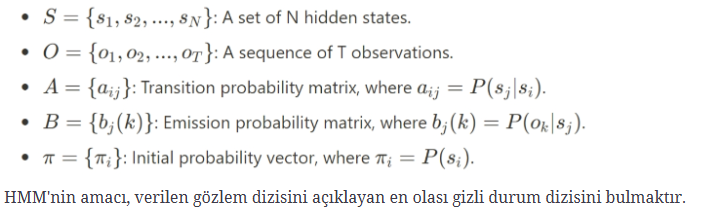

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from hmmlearn import hmm

# Define the states and observations
states = ["Noun", "Verb"]
n_states = len(states)
observations = ["I", "run", "to", "the", "store"]
n_observations = len(observations)

# Transition probability matrix (A)
transition_probability = np.array([
    [0.7, 0.3],  # From Noun to [Noun, Verb]
    [0.4, 0.6]   # From Verb to [Noun, Verb]
])

# Emission probability matrix (B)
emission_probability = np.array([
    [0.2, 0.3, 0.2, 0.1, 0.2],  # From Noun to ["I", "run", "to", "the", "store"]
    [0.1, 0.6, 0.1, 0.1, 0.1]   # From Verb to ["I", "run", "to", "the", "store"]
])

# Initial probability vector (pi)
start_probability = np.array([0.6, 0.4])  # [Noun, Verb]

# Create the HMM model WITHOUT n_trials
model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Encode the observations to integers
observation_sequence = [0, 1, 2, 3, 4]  # "I", "run", "to", "the", "store"
observation_sequence = np.array(observation_sequence).reshape(-1, 1)

# Specify the number of features explicitly
model.n_features = n_observations

# No need to fit the model if you are directly specifying parameters


logprob, hidden_states = model.decode(observation_sequence, algorithm="viterbi")

print("Observations:", [observations[i] for i in observation_sequence.flatten()])
print("Hidden states:", [states[i] for i in hidden_states])


## **4.3 Tekrarlayan Sinir Ağları (RNN'ler)**

Tekrarlayan Sinir Ağları (RNN'ler), sıralı verileri işlemek için özel olarak tasarlanmış büyüleyici ve oldukça uzmanlaşmış bir sinir ağı sınıfıdır. Zamansal bağımlılıkları dikkate almadan girdileri basit bir şekilde işleyen geleneksel ileri beslemeli sinir ağlarının aksine, RNN'ler yönlendirilmiş döngüler oluşturan bağlantılara sahiptir. Bu benzersiz yapı, zaman içinde önceki girdiler hakkında bilgileri etkili bir şekilde yakalayan ve koruyan gizli bir durumu korumalarını sağlar.
Geçmiş girdileri hatırlama yeteneği, RNN'leri özellikle zaman serisi verilerini içeren ve veri noktalarının sırasının ve zamanlamasının kritik olduğu çok çeşitli görevler için uygun hale getirir. Örneğin, doğal dil işlemede (NLP), RNN'ler bir cümledeki önceki kelimelerin sağladığı bağlamı dikkate alarak metni anlayabilir ve üretebilir.
Ek olarak, konuşma tanıma, video analizi ve finansal tahmin gibi verilerin zamansal veya ardışık düzeninin önemli olduğu diğer alanları ele almada da ustadırlar. RNN'lerin çok yönlülüğü ve güçlü yetenekleri, onları birçok gelişmiş makine öğrenimi uygulamasında paha biçilmez bir araç haline getirir.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical

# Sample text corpus
text = "merhaba işe yaramazlar"

# Create a character-level vocabulary
chars = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

# Create input-output pairs for training
sequence_length = 2
X = []
y = []
for i in range(len(text) - sequence_length):
    X.append([char_to_idx[char] for char in text[i:i + sequence_length]])
    y.append(char_to_idx[text[i + sequence_length]])

X = np.array(X)
y = to_categorical(y, num_classes=len(chars))

# Reshape input to be compatible with RNN input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(20, input_shape=(sequence_length, 1)))
model.add(Dense(len(chars), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
model.fit(X, y, epochs=500, verbose=2)



Epoch 1/500
1/1 - 2s - 2s/step - loss: 2.3282
Epoch 2/500
1/1 - 0s - 60ms/step - loss: 2.3142
Epoch 3/500
1/1 - 0s - 61ms/step - loss: 2.3004
Epoch 4/500
1/1 - 0s - 61ms/step - loss: 2.2870
Epoch 5/500
1/1 - 0s - 60ms/step - loss: 2.2738
Epoch 6/500
1/1 - 0s - 72ms/step - loss: 2.2610
Epoch 7/500
1/1 - 0s - 44ms/step - loss: 2.2484
Epoch 8/500
1/1 - 0s - 46ms/step - loss: 2.2361
Epoch 9/500
1/1 - 0s - 46ms/step - loss: 2.2241
Epoch 10/500
1/1 - 0s - 61ms/step - loss: 2.2123
Epoch 11/500
1/1 - 0s - 61ms/step - loss: 2.2007
Epoch 12/500
1/1 - 0s - 59ms/step - loss: 2.1894
Epoch 13/500
1/1 - 0s - 46ms/step - loss: 2.1782
Epoch 14/500
1/1 - 0s - 60ms/step - loss: 2.1673
Epoch 15/500
1/1 - 0s - 48ms/step - loss: 2.1565
Epoch 16/500
1/1 - 0s - 46ms/step - loss: 2.1459
Epoch 17/500
1/1 - 0s - 59ms/step - loss: 2.1354
Epoch 18/500
1/1 - 0s - 62ms/step - loss: 2.1252
Epoch 19/500
1/1 - 0s - 59ms/step - loss: 2.1150
Epoch 20/500
1/1 - 0s - 62ms/step - loss: 2.1051
Epoch 21/500
1/1 - 0s - 58ms/st

In [ ]:
# Function to generate text using the trained model
def generate_text(model, start_string, num_generate):
    input_eval = [char_to_idx[s] for s in start_string]
    input_eval = np.array(input_eval).reshape((1, len(input_eval), 1))
    text_generated = []
    for i in range(num_generate):
        print(i)
        predictions = model.predict(input_eval)
        predicted_id = np.argmax(predictions[0])
        input_eval = np.append(input_eval[:, 1:, :], [[[predicted_id]]], axis=1)
        input_eval = input_eval.reshape((1, -1, 1))  # Ensure dimensions match
        text_generated.append(idx_to_char[predicted_id])

    return start_string + ''.join(text_generated)



In [ ]:
# Generate new text
start_string = "merhaba işe ya"
generated_text = generate_text(model, start_string, 2)
print("Generated text:")
print(generated_text)

0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Generated text:
merhaba işe yarl


## **4.4 Long Short-Term Memory Networks (LSTMs)**

Uzun Kısa Süreli Bellek Ağları (LSTM'ler), standart RNN'lerin sıklıkla uğraştığı uzun vadeli bağımlılıklar ve kaybolan eğim sorunuyla ilişkili zorlukları ele almak üzere özel olarak tasarlanmış özel bir Yinelemeli Sinir Ağları (RNN'ler) türüdür.
Bu ağlar, uzun süreler boyunca bilgileri koruyabilen bellek hücrelerini bir araya getirerek verilerdeki uzun menzilli zamansal bağımlılıkları etkili bir şekilde yakalamalarına ve kullanmalarına olanak tanır. LSTM'ler, daha doğru dil modelleri ve makine çeviri sistemleri sağladıkları doğal dil işleme; gelişmiş doğruluk ve sağlamlığa katkıda bulundukları konuşma tanıma; ve geçmiş verilerden öğrenerek güvenilir tahminler sağladıkları zaman serisi tahmini dahil ancak bunlarla sınırlı olmamak üzere, dizi tabanlı çok çeşitli görevlerde oldukça başarılı olmuştur. Uzun vadeli bağlamsal bilgileri koruma ve işleme yetenekleri, LSTM'leri yapay zeka ve makine öğrenimi alanında paha biçilmez bir araç haline getirir.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

# Sample text corpus
text = "hello world"

# Create a character-level vocabulary
chars = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

# Create input-output pairs for training
sequence_length = 3
X = []
y = []
for i in range(len(text) - sequence_length):
    X.append([char_to_idx[char] for char in text[i:i + sequence_length]])
    y.append(char_to_idx[text[i + sequence_length]])

X = np.array(X)
y = to_categorical(y, num_classes=len(chars))

# Reshape input to be compatible with LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(len(chars), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
model.fit(X, y, epochs=200, verbose=0)


In [ ]:

# Function to generate text using the trained model
def generate_text(model, start_string, num_generate):
    input_eval = [char_to_idx[s] for s in start_string]
    input_eval = np.array(input_eval).reshape((1, len(input_eval), 1))
    text_generated = []
    for i in range(num_generate):
        print(i)
        predictions = model.predict(input_eval)
        predicted_id = np.argmax(predictions[0])
        input_eval = np.append(input_eval[:, 1:, :], [[[predicted_id]]], axis=1)
        input_eval = input_eval.reshape((1, -1, 1))  # Ensure dimensions match
        text_generated.append(idx_to_char[predicted_id])

    return start_string + ''.join(text_generated)



In [ ]:
# Generate new text
start_string = "hel"
generated_text = generate_text(model, start_string, 1)
print("Generated text:")
print(generated_text)

0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Generated text:
hell


**4.4.4 LSTM'lerin Uygulamaları**

Uzun Kısa Süreli Bellek (LSTM) ağları, sıralı verilerdeki uzun vadeli bağımlılıkları etkili bir şekilde yakalayıp kullanarak birçok alanda devrim yaratmıştır. Burada, LSTM'lerin çeşitli alanlardaki bazı temel uygulamalarını inceliyoruz:

**1. Metin Oluşturma**

LSTM'ler, amacın tutarlı ve bağlamsal olarak alakalı metin dizileri oluşturmak olduğu metin oluşturma görevlerinde yaygın olarak kullanılır. LSTM'ler, büyük metin korpuslarında eğitim vererek, eğitim verilerinin stilini ve yapısını taklit eden yeni metinler üretebilir. Bunun yaratıcı yazma, otomatik içerik oluşturma ve hatta sohbet robotlarında uygulamaları vardır.

**2. Makine Çevirisi**

Makine çevirisinde, LSTM'ler metni bir dilden diğerine çevirmek için kullanılır. Sözdizimi ve anlambilim gibi dilin karmaşıklıklarını ele almada özellikle etkilidirler ve bu da onları Google Translate gibi çeviri sistemleri oluşturmak için uygun hale getirir. Sıradan sıraya mimariyi kullanarak, LSTM'ler giriş sıralarını (kaynak dil) çıkış sıralarına (hedef dil) yüksek doğrulukla eşleyebilir.

**3. Konuşma Tanıma**

LSTM'ler, konuşulan dili yazılı metne dönüştüren konuşma tanıma sistemlerinde önemli bir rol oynar. Bu sistemlerin ses sinyallerindeki zamansal bağımlılıkları hesaba katması gerekir, bu da LSTM'leri ideal bir seçim haline getirir. Uygulamalar arasında Siri ve Alexa gibi sanal asistanlar, transkripsiyon hizmetleri ve sesle kontrol edilen uygulamalar bulunur.

**4. Zaman Serisi Tahmini**

Zaman serisi tahmininde, LSTM'ler geçmiş verilere dayalı gelecekteki değerleri tahmin etmek için kullanılır. Bu, finans (hisse senedi fiyatı tahmini), hava durumu tahmini ve sağlık (hasta sağlık ölçümlerini tahmin etme) gibi çeşitli sektörlerde değerlidir. LSTM'lerin geçmiş bilgileri uzun süreler boyunca hatırlama yeteneği, onları bu görevler için oldukça uygun hale getirir.

**5. Duygu Analizi**

Duygu analizi, metnin duygusunu olumlu, olumsuz veya nötr olarak sınıflandırmayı içerir. LSTM'ler, metinde ifade edilen bağlamı ve duyguyu anlamak için kullanılır; bu, sosyal medya izleme, müşteri geri bildirim analizi ve pazar araştırması gibi uygulamalar için faydalıdır. LSTM'ler, kelime dizisini analiz ederek, bir metin parçasında iletilen duyguyu doğru bir şekilde belirleyebilir.

**6. Video Analizi**

Video analizinde, LSTM'ler kare dizilerini anlamak ve tahmin etmek için kullanılır. Bunun video altyazılama, etkinlik tanıma ve anormallik tespitinde uygulamaları vardır. Video karelerini sıralı veri olarak işleyerek, LSTM'ler zamansal örüntüleri yakalayabilir ve anlamlı içgörüler sağlayabilir.

**7. El Yazısı Tanıma**

LSTM'ler ayrıca el yazısı tanıma sistemlerinde de kullanılır ve bu sistemler el yazısı metinlerini dijital metne dönüştürür. Bu sistemler tarihi belgeleri dijitalleştirmede, not alma uygulamalarında ve posta adresi tanımada kullanılır. LSTM'ler el yazısı vuruşlarının ardışık doğasını etkili bir şekilde işleyebilir ve bu da onları bu görev için ideal hale getirir.

**8. Sağlık**

Sağlık hizmetlerinde LSTM'ler, hastalık ilerlemesini, hasta sonuçlarını ve tedavi yanıtlarını tahmin etme gibi çeşitli öngörücü modelleme görevlerinde uygulanır. LSTM'ler, uzunlamasına hasta verilerini analiz ederek, klinik karar alma ve kişiselleştirilmiş tıpta yardımcı olan değerli öngörüler sağlayabilir.

**9. Müzik Üretimi**

LSTM'ler mevcut bestelerden öğrenerek müzik üretmek için kullanılır. Belirli bir stilde veya türde yeni parçalar yaratabilirler ve bu da onları besteciler, oyun geliştiricileri ve eğlence endüstrileri için kullanışlı hale getirir. LSTM'ler müzikteki zamansal bağımlılıkları yakalayarak melodik ve armonik olarak tutarlı besteler üretebilir.

**10. Anomali Tespiti**

Anomali tespitinde, LSTM'ler sıralı verilerdeki alışılmadık kalıpları belirlemek için kullanılır. Bu, dolandırıcılık tespiti, ağ güvenliği ve üretim süreci izleme gibi uygulamalarda faydalıdır. Normal kalıpları öğrenerek, LSTM'ler potansiyel anomalileri gösteren sapmaları etkili bir şekilde tespit edebilir.
Özetle, LSTM'ler uzun vadeli bağımlılıkları ve ardışık verileri işleme yeteneklerini kullanarak farklı alanlarda geniş bir uygulama yelpazesine sahiptir. Çok yönlülükleri ve etkililikleri onları modern makine öğrenimi ve yapay zeka cephaneliğinde güçlü bir araç haline getirir.

# Chapter 5 - Syntax and Parsing

## **5.1 Konuşma Türleri (POS) Etiketleme**

Konuşma Türleri (POS) etiketleme, bir cümledeki her kelimeye isimler, fiiller, sıfatlar ve zarflar gibi dilbilgisi kategorileri atamanın karmaşık sürecidir.

her kelimenin belirli bağlamındaki rolünü doğru bir şekilde belirlemek için karmaşık algoritmalar ve dil kuralları içerir.

POS etiketleme, cümlelerin sözdizimsel yapısını anlamak için önemlidir ve dilin daha derin bir şekilde anlaşılmasını sağlar.

 Cümlelerin dilbilgisi yapısını analiz etmeyi içeren ayrıştırma; kişilerin, kuruluşların veya yerlerin adları gibi belirli varlıkların tanımlandığı adlandırılmış varlık tanıma; ve metni bir dilden diğerine doğru bir şekilde çevirmek için cümle yapısının kapsamlı bir şekilde anlaşılmasını gerektiren makine çevirisi gibi daha gelişmiş Doğal Dil İşleme (NLP) görevleri için önemli bir temel görevi görür.

**5.1.1 Konuşma Bölümleri Etiketlemeyi Anlama**

**İsim (NN) :** Bunlar insanların, yerlerin, şeylerin veya soyut kavramların adlarıdır. Örneğin, "köpek", "şehir" veya "mutluluk" gibi kelimeler bu kategoriye girer.

**Fiil (VB) :** Bu kelimeler eylemleri veya varoluş durumlarını temsil eder. Örnekler arasında özne ne yaptığını veya durumunu gösteren "koşmak", "olmak" ve "düşünmek" bulunur.

**Sıfat (JJ) :** Sıfatlar, isimleri tanımlayan veya değiştiren, onlar hakkında daha fazla bilgi sağlayan kelimelerdir. Örneğin, "büyük", "mavi" veya "ilginç" ayrıntı ekleyen sıfatlardır.

**Zarf (RB) :** Zarflar, fiilleri, sıfatları veya diğer zarfları değiştiren, genellikle bir şeyin nasıl, ne zaman, nerede veya ne ölçüde gerçekleştiğini belirten kelimelerdir. Örnekler "hızlıca", "çok" ve "nadiren"dir.

**Zamir (PRP) :** Zamirler, tekrarı önlemek ve cümleleri basitleştirmek için isimlerin yerini alan kelimelerdir. Örnekler arasında "o", "onlar", "o" ve "biz" bulunur.

**Edat (IN) :** Edatlar, bir cümledeki isimler (veya zamirler) ile diğer kelimeler arasındaki ilişkileri gösteren kelimelerdir ve genellikle yön, yer veya zamanı belirtir. Örnekler arasında "on", "in", "under" ve "before" bulunur.

**5.1.2 Python'da POS Etiketlemeyi Uygulama**

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('all', quiet=True)


True

In [ ]:
nltk.download('averaged_perceptron_tagger')
# Sample text
text = "Natural Language Processing with Python is fascinating."
# Tokenize the text into words
tokens = word_tokenize(text)
# Perform POS tagging
pos_tags = pos_tag(tokens)
print("POS Tags:")
print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


POS Tags:
[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('with', 'IN'), ('Python', 'NNP'), ('is', 'VBZ'), ('fascinating', 'VBG'), ('.', '.')]


In [ ]:
!pip install trnlp

from trnlp import TrnlpTokenizer
from trnlp import TrnlpWordTokenizer
from trnlp import TrnlpNormalizer
from trnlp import TrnlpWordNet
from trnlp import TrnlpPosTagger

# Örnek Türkçe metin
text = "Doğal Dil İşleme ile Python kullanarak metin analizi yapmak oldukça ilgi çekici."

# Metni kelimelere ayır
tokenizer = TrnlpWordTokenizer()
tokens = tokenizer.word_tokenize(text)

# POS etiketleme işlemi
pos_tagger = TrnlpPosTagger()
pos_tags = pos_tagger.pos_tag(tokens)

print("POS Tags:")
print(pos_tags)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for trnlp: filename=trnlp-0.2.3a0-py3-none-any.whl size=10168260 sha256=c45972ff4f6cb5cb754acdb988dd01ce83b53512f8b4c1d381e983bb262a19d3
  Stored in directory: /root/.cache/pip/wheels/f5/75/d1/fb5c7ad584aafd96ae8d425dcdb7e64296f729fcb2eeccf26b
Successfully built trnlp


ImportError: cannot import name 'TrnlpTokenizer' from 'trnlp' (/usr/local/lib/python3.11/dist-packages/trnlp/__init__.py)

In [ ]:
import stanza

# Stanza Türkçe modeli indir
stanza.download('tr')

# Türkçe NLP pipeline oluştur
nlp = stanza.Pipeline('tr')

# Örnek Türkçe metin
text = "Doğal Dil İşleme ile Python kullanarak metin analizi yapmak oldukça ilgi çekici."

# Metni işle
doc = nlp(text)

# POS etiketleme sonuçlarını yazdır
print("POS Tags:")
for sentence in doc.sentences:
    for word in sentence.words:
        print(f"{word.text}\t{word.pos}")

ModuleNotFoundError: No module named 'stanza'

In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
import stanza

# Stanza Türkçe modeli indir
stanza.download('tr')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: tr (Turkish) ...


INFO:stanza:Downloaded file to /root/stanza_resources/tr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:

# Türkçe NLP pipeline oluştur
nlp = stanza.Pipeline('tr')

# Örnek Türkçe metin
text = "Doğal Dil İşleme ile Python kullanarak metin analizi yapmak oldukça ilgi çekici."

# Metni işle
doc = nlp(text)

# POS etiketleme sonuçlarını yazdır
print("POS Tags:")
for sentence in doc.sentences:
    for word in sentence.words:
        print(f"{word.text}\t{word.pos}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package       |
-----------------------------
| tokenize  | imst          |
| mwt       | imst          |
| pos       | imst_charlm   |
| lemma     | imst_nocharlm |
| depparse  | imst_charlm   |
| ner       | starlang      |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


POS Tags:
Doğal	ADJ
Dil	NOUN
İşleme	VERB
ile	CCONJ
Python	NOUN
kullanarak	VERB
metin	NOUN
analizi	NOUN
yapmak	VERB
oldukça	ADV
ilgi	NOUN
çekici	NOUN
.	PUNCT


**5.1.3 POS Etiketleyicilerinin Değerlendirilmesi**

Kelime Parçası (POS) etiketleyicilerinin performansını değerlendirmek, çeşitli Doğal Dil İşleme (NLP) görevlerinde etkililiğini sağlamada önemli bir adımdır.

 Bu değerlendirme için kullanılan birincil ölçütlerden biri , doğru şekilde etiketlenen kelimelerin oranını ölçen doğruluktur

Yüksek doğruluk, etiketleyicinin kelimelerin doğru dilbilgisi kategorilerini belirlemede iyi performans gösterdiğini gösterir.

Önceki örnekte kullanılan gibi önceden eğitilmiş etiketleyiciler, büyük, açıklamalı metinler üzerinde eğitilmiş modellerle gelir. Bu metinler, her kelimenin doğru sözcük türüyle etiketlendiği çok miktarda metin verisi içerir. Kapsamlı ve çeşitli veri kümeleri üzerinde eğitildikleri için, önceden eğitilmiş etiketleyiciler genellikle yüksek doğruluk sağlar ve birçok standart uygulamada etkilidir.

Ancak bu etiketleyicilerin performansı çeşitli faktörlere bağlı olarak önemli ölçüde değişebilir:

**Metin Alanı :**

 Metnin alanı veya türü, POS etiketleyicilerinin doğruluğunu etkileyebilir. Örneğin, haber makaleleri konusunda eğitilmiş bir etiketleyici, dil, stil ve kelime dağarcığı büyük ölçüde farklılık gösterebileceğinden sosyal medya metinlerinde iyi performans gösteremeyebilir.

**Dil :**

Metnin dili bir diğer kritik faktördür. Bazı önceden eğitilmiş etiketleyiciler birden fazla dille çalışmak üzere tasarlanmış olsa da, performansları belirli dile ve dilsel özelliklerine göre değişebilir.

**Belirsizlik :**

 Doğal dil, bağlama bağlı olarak birden fazla konuşma bölümüne ait olabilen belirsiz sözcükler içerir. Örneğin, "koşmak" sözcüğü bir fiil ("Her sabah koşarım") veya bir isim ("Koşuya çıktım") olabilir. Bir POS etiketleyicisinin bu tür sözcükleri doğru şekilde belirsizleştirme yeteneği, yüksek doğruluk için önemlidir.

**Eğitim Verilerinin Kalitesi :**

Etiketleyiciyi eğitmek için kullanılan açıklamalı korpusların kalitesi ve temsililiği de önemli bir rol oynar. Yüksek kaliteli, iyi açıklamalı ve çeşitli eğitim verileri daha iyi performansa yol açabilir.

***Diğer Metriklerle Değerlendirme***

Doğruluğun yanı sıra, POS etiketleyicilerini değerlendirmek için başka ölçümler de kullanılabilir:

**Kesinlik :**

 Etiketleyicinin belirli bir konuşma parçası olarak tanımladığı kelimeler arasında doğru etiketlenen kelimelerin oranını ölçer.

**Hatırlama :**

Etiketleyicinin belirli bir konuşma bölümünün gerçek örneklerinin oranını doğru bir şekilde belirlemesini ölçer.

**F1 Puanı :**

Etiketleyicinin performansının dengeli bir ölçümünü sağlayan, hassasiyet ve geri çağırmanın harmonik ortalaması.

***Pratik Değerlendirme***

In [ ]:
from nltk import pos_tag
from nltk.corpus import treebank
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
nltk.download('treebank')
# Load the treebank corpus
test_data = treebank.tagged_sents()[3000:]
test_sentences = [[word for word, tag in sent] for sent in test_data]
gold_standard = [[tag for word, tag in sent] for sent in test_data]
# Tag the test sentences using a pre-trained tagger
tagger = nltk.PerceptronTagger()
predicted_tags = [tagger.tag(sent) for sent in test_sentences]
predicted_tags = [[tag for word, tag in sent] for sent in predicted_tags]
# Flatten the lists to compute metrics
gold_standard_flat = [tag for sent in gold_standard for tag in sent]
predicted_tags_flat = [tag for sent in predicted_tags for tag in sent]
# Compute evaluation metrics
accuracy = accuracy_score(gold_standard_flat, predicted_tags_flat)
precision = precision_score(gold_standard_flat, predicted_tags_flat, average='weighted')
recall = recall_score(gold_standard_flat, predicted_tags_flat, average='weighted')
f1 = f1_score(gold_standard_flat, predicted_tags_flat, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8964817612777898
Precision: 0.8470266295191433
Recall: 0.8964817612777898
F1 Score: 0.868165148433817


Bu metrikler konsola yazdırılır ve POS etiketleyicinin performansını değerlendirmenize olanak tanır.
Özetle, bu örnek nltk'den treebank corpus'u kullanarak bir POS etiketleyicisinin kapsamlı bir değerlendirmesini sağlar. Anahtar değerlendirme metriklerini hesaplayarak ve yazdırarak, etiketleyicinin belirli bir metindeki kelimelerin doğru dilbilgisi kategorilerini belirlemede ne kadar iyi performans gösterdiğini anlamaya yardımcı olur.

POS etiketleyicilerini değerlendirmek, bunların etkinliğini ve sınırlamalarını anlamak için önemlidir. Doğruluk, kesinlik, geri çağırma ve F1 puanı gibi ölçümleri kullanarak, bir etiketleyicinin farklı alanlarda ve dillerde ne kadar iyi performans gösterdiğine dair içgörüler elde edilebilir.
Bu değerlendirme, belirli NLP görevleri için uygun etiketleyicinin seçilmesine yardımcı olur ve seçilen etiketleyicinin istenen performans kriterlerini karşılamasını sağlar.

***Örnek: Özel bir POS Etiketleyicisini Eğitmek***

In [ ]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.corpus import treebank
nltk.download('treebank')
# Load the treebank corpus
train_data = treebank.tagged_sents()[:3000]
test_data = treebank.tagged_sents()[3000:]
# Train a UnigramTagger
unigram_tagger = UnigramTagger(train_data)
# Evaluate the tagger
accuracy = unigram_tagger.evaluate(test_data)
print("Unigram Tagger Accuracy:", accuracy)
# Train a BigramTagger backed by the UnigramTagger
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)
# Evaluate the tagger
accuracy = bigram_tagger.evaluate(test_data)
print("Bigram Tagger Accuracy:", accuracy)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
<ipython-input-106-5d00b359d51f>:10: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = unigram_tagger.evaluate(test_data)


Unigram Tagger Accuracy: 0.8571551910209367


<ipython-input-106-5d00b359d51f>:15: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = bigram_tagger.evaluate(test_data)


Bigram Tagger Accuracy: 0.864839197064537


***Özel POS Etiketleyicileri Eğitimi İçin Dikkat Edilmesi Gerekenler***

**Açıklamalı Verilerin Kalitesi :**

Özel POS etiketleyicinin performansı büyük ölçüde açıklamalı eğitim verilerinin kalitesine ve boyutuna bağlıdır. Yüksek kaliteli, iyi açıklamalı veriler daha iyi etiketleyici performansına yol açacaktır.

**Hesaplama Kaynakları :**

 Özellikle büyük veri kümeleri veya gelişmiş modeller kullanan özel POS etiketleyicilerini eğitmek önemli miktarda hesaplama kaynağı gerektirebilir.

**Değerlendirme ve Test :**

Etkinliğini sağlamak için ayrı test veri kümelerini kullanarak özel POS etiketleyicisini kapsamlı bir şekilde değerlendirin. Doğruluk, kesinlik, geri çağırma ve F1 puanı gibi birden fazla ölçüm kullanmayı düşünün.

Özel POS etiketleyicileri eğiterek, belirli alanlardaki NLP uygulamalarının performansını artırabilir, daha doğru ve güvenilir sonuçlar elde edebilirsiniz.

***POS etiketleme uygulamaları***

**Ayrıştırma :**

Cümlelerin dilbilgisi yapısını anlamak birçok NLP görevi için çok önemlidir. Ayrıştırma, sözdizimsel yapılarını anlamak için cümleleri bileşenlerine ayırmayı içerir. POS etiketleme, her kelime için gerekli dilbilgisi etiketlerini sağlayarak bu sürece yardımcı olur ve bu da ayrıştırma ağaçlarının oluşturulmasına ve cümle sözdiziminin anlaşılmasına yardımcı olur.

**Adlandırılmış Varlık Tanıma (NER) :**

NER, metindeki varlıkları, örneğin kişilerin, kuruluşların, tarihlerin ve yerlerin adlarını tanımlamayı ve sınıflandırmayı içerir. POS etiketleme, farklı kelime türleri arasında ayrım yaparak bu süreçte yardımcı olur ve uygun isimleri ve diğer ilgili varlıkları tanımlamayı kolaylaştırır. Örneğin, "Londra"nın uygun bir isim olduğunu (NNP) fark etmek, onu bir yer olarak tanımlamaya yardımcı olabilir.


**Duygu Analizi :**

Duygu analizi, bir metin parçasının duygusunu veya duygusal tonunu belirlemeyi amaçlar. Duygu analizi sistemleri, sözcük türlerini etiketleyerek bir cümledeki farklı sözcüklerin rolünü daha iyi anlayabilir. Örneğin, sıfatlar (JJ) genellikle duygu bilgisi taşır (örneğin, "mutlu", "üzgün") ve bunların dilbilgisi rolünü anlamak duygu analizinin doğruluğunu artırabilir.

**Bilgi Çıkarımı :**

Bu, bir belgeden tarihleri, isimleri veya belirli nitelikleri çıkarmak gibi yapılandırılmamış metinden yapılandırılmış bilgileri çıkarmayı içerir. POS etiketleme, kelimelerin dilbilgisi rollerini belirlemeye yardımcı olarak ilgili bilgi parçalarını çıkarmayı kolaylaştırır. Örneğin, fiilleri (VB) ve bunlarla ilişkili özneleri ve nesneleri tanımlamak, metinden eylemleri ve varlıkları çıkarmaya yardımcı olabilir.

**Makine Çevirisi :**

Metni bir dilden diğerine çevirmek, cümle yapısının derinlemesine anlaşılmasını gerektirir. POS etiketleme, doğru çeviri için olmazsa olmaz olan kelimelerin dilbilgisi rollerini belirlemeye yardımcı olur. Makine çeviri sistemleri, konuşma bölümlerini anlayarak çeviri sırasında cümlelerin sözdizimsel ve anlamsal bütünlüğünü koruyabilir.

**Metinden Konuşmaya Sistemleri :**

Metinden konuşmaya dönüştürmede, cümlelerin dilbilgisi yapısını anlamak doğal sesli konuşma üretmeye yardımcı olur. POS etiketleme, bir cümlenin farklı bölümleri için doğru tonlama ve vurguyu belirlemeye yardımcı olur ve üretilen konuşmanın doğallığını artırır.

**Dilbilgisi Kontrolü :**

POS etiketleme, metindeki dilbilgisi hatalarını belirlemek için dilbilgisi kontrol araçlarında kullanılır. Bu araçlar, farklı kelimelerin rollerini anlayarak yanlış fiil zamanları, özne-fiil uyum hataları ve yanlış yerleştirilmiş sıfatlar gibi sorunları tespit edebilir ve düzeltme önerileri sunabilir.

## **5.2 Adlandırılmış Varlık Tanıma (NER)**

Adlandırılmış Varlık Tanıma (NER), yapılandırılmamış metinde belirtilen adlandırılmış varlıkları tanımlamayı ve sınıflandırmayı amaçlayan bilgi çıkarma işleminin önemli bir alt görevidir. Bu varlıklar, kişilerin adları, kuruluşlar, konumlar, zaman ifadeleri, miktarlar, parasal değerler, yüzdeler ve daha fazlası gibi önceden tanımlanmış gruplara ayrılır.

NER'in yetenekleri, yapılandırılmamış verilerden yapılandırılmış bilgi sağlayarak doğal dil işleme (NLP) görevlerinin performansını artırmaya kadar uzanır ve böylece daha kesin ve bağlamsal olarak farkında analizler mümkün olur

In [ ]:
import spacy
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_sm')
# Sample text
text = "Apple is looking at buying U.K. startup for 1 billion."
# Process the text with the spaCy model
doc = nlp(text)
# Print named entities with their labels
print("Named Entities:")
for ent in doc.ents:
  print(ent.text, ent.label_)

Named Entities:
Apple ORG
U.K. GPE
1 billion CARDINAL


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# True entities in the text (manually annotated)
true_entities = ["Apple", "U.K.", "startup", "1 billion"]
# Entities identified by the NER system
predicted_entities = ["Apple", "UK", "startup", "1B"]
# Calculate precision, recall, and F1 score
precision = precision_score(true_entities, predicted_entities, average='micro')
recall = recall_score(true_entities, predicted_entities, average='micro')
f1 = f1_score(true_entities, predicted_entities, average='micro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5
Recall: 0.5
F1 Score: 0.5


In [ ]:
import spacy
from spacy.tokens import DocBin
from spacy.training import Example
from spacy.util import minibatch, compounding

In [ ]:
nlp = spacy.blank("en")

In [ ]:
ner = nlp.add_pipe("ner")

In [ ]:
ner.add_label("GADGET")

1

In [ ]:
TRAIN_DATA = [
("Apple is releasing a new iPhone.", {"entities": [(26, 32, "GADGET")]}),
("The new iPad Pro is amazing.", {"entities": [(8, 16, "GADGET")]}),
]

In [ ]:
doc_bin = DocBin()
for text, annotations in TRAIN_DATA:
   doc = nlp.make_doc(text)
   example = Example.from_dict(doc, annotations)
   doc_bin.add(example.reference)

/usr/local/lib/python3.11/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Apple is releasing a new iPhone." with entities "[(26, 32, 'GADGET')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


In [ ]:
examples = doc_bin.get_docs(nlp.vocab)

In [ ]:
optimizer = nlp.begin_training()
for epoch in range(10):
  losses = {}
  batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
  for batch in batches:
    losses = {}
      #nlp.update(batch, drop=0.5, losses=losses)
  print("Losses", losses)

Losses {}
Losses {}
Losses {}
Losses {}
Losses {}
Losses {}
Losses {}
Losses {}
Losses {}
Losses {}


In [ ]:
doc = nlp("I just bought a new iPhone.")
print("Named Entities:", [(ent.text, ent.label_) for ent in doc.ents])

Named Entities: []


In [2]:
import spacy
from spacy.tokens import DocBin
from spacy.training import Example
from spacy.util import minibatch, compounding

# Create a blank English model
nlp = spacy.blank("en")

# Create a new NER component and add it to the pipeline
ner = nlp.add_pipe("ner")

# Add labels to the NER component
ner.add_label("GADGET")

# Sample training data
TRAIN_DATA = [
    ("Apple is releasing a new iPhone.", {"entities": [(26, 32, "GADGET")]}),
    ("The new iPad Pro is amazing.", {"entities": [(8, 16, "GADGET")]}),
]

# Convert the training data to spaCy's format
doc_bin = DocBin()
for text, annotations in TRAIN_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annotations)
    doc_bin.add(example.reference)

# Load the training data
examples = doc_bin.get_docs(nlp.vocab)

# Train the NER model
optimizer = nlp.begin_training()
for epoch in range(10):
    losses = {}
    batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
         nlp.update(batch, drop=0.5, losses=losses)
    print("Losses", losses)

# Test the trained model
doc = nlp("I just bought a new iPhone.")
print("Named Entities:", [(ent.text, ent.label_) for ent in doc.ents])

TypeError: [E978] The Language.update method takes a list of Example objects, but got: {<class 'spacy.tokens.doc.Doc'>}